<a href="https://colab.research.google.com/github/chcorophyll/my_deeplearning_cookbook/blob/master/my_icon_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/chcorophyll/deep_learning_cookbook.git

Cloning into 'deep_learning_cookbook'...
remote: Enumerating objects: 427, done.
remote: Total 427 (delta 0), reused 0 (delta 0), pack-reused 427
Receiving objects: 100% (427/427), 160.26 MiB | 31.80 MiB/s, done.
Resolving deltas: 100% (207/207), done.
Checking out files: 100% (86/86), done.


In [2]:
!ls

deep_learning_cookbook	sample_data


In [0]:
import os

path_org = os.getcwd()
path_data = os.path.join(path_org, "deep_learning_cookbook")
os.chdir(path_data)

**Importing icons**

In [4]:
!pip install plyvel

     |████████████████████████████████| 614kB 3.3MB/s 


In [5]:
!pip install svglib

     |████████████████████████████████| 901kB 3.4MB/s 
     |████████████████████████████████| 2.6MB 54.0MB/s 
     |████████████████████████████████| 71kB 34.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/4c/cb/30/e37faa2503a07bd5ef439c802320c672d2ec308d4c83165fd8
Successfully built svglib


In [0]:
import plyvel
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM
import re
from io import BytesIO
import shutil
from PIL import Image
import os
import json
import unicodedata

In [0]:
path_icon= os.path.join(path_data,"icons")
os.makedirs(path_icon)
os.chdir(path_icon)

In [8]:
from google.colab import files

uploaded = files.upload()

Saving 000005.ldb to 000005.ldb
Saving CURRENT to CURRENT
Saving LOG to LOG
Saving LOG.old to LOG.old
Saving MANIFEST-000004 to MANIFEST-000004


In [0]:
os.chdir(path_data)

In [0]:
db = plyvel.DB(path_icon)

In [11]:
splitter = re.compile(b'[\x00-\x08]')

def parse_value(value):
    res = {}
    prev = ''
    for elem in splitter.split(value):
        if not elem:
            continue
        try:
            elem = elem.decode('utf8')
        except UnicodeDecodeError:
            continue
        if elem in ('category', 'name', 'platform', 'canonical_name', 'svg'):
            if elem == 'name' and len(prev) == 1:
                prev = 'u_' + unicodedata.name(prev).lower().replace(' ', '_')
            res[elem] = prev
        prev = elem
    return res

for _, value in db:
    res = parse_value(value)
    break
res

{'canonical_name': 'Address Book',
 'category': 'Messaging',
 'name': 'address_book',
 'platform': 'windows',
 'svg': '<?xml version="1.0" encoding="utf-8"?>\n<!-- Generator: Adobe Illustrator 15.0.0, SVG Export Plug-In . SVG Version: 6.00 Build 0)  -->\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" version="1.1" id="Layer_1" x="0px" y="0px" width="26px" height="26px" viewBox="0 0 26 26" enable-background="new 0 0 26 26" xml:space="preserve">\n\n<path fill="#000000" d="M12.792,9.803c-0.221,0-0.423,0.053-0.618,0.166c-0.2,0.111-0.399,0.302-0.594,0.562  c-0.198,0.266-0.359,0.593-0.48,0.977c-0.121,0.385-0.184,0.741-0.184,1.061c0,0.488,0.115,0.867,0.34,1.126  c0.371,0.428,0.811,0.485,1.343,0.205c0.225-0.121,0.444-0.304,0.653-0.543c0.207-0.241,0.382-0.553,0.517-0.929  c0.136-0.378,0.206-0.759,0.206-1.137c0-0.481-0.119-0.855-0.354-1.112C13.393,9.926,13.12,9.

In [12]:
icons = {}

for key, value in db:
    try:
        res = parse_value(value)
    except ValueError:
        continue
    if res.get('platform') == 'ios':
        name = res.get('name')
        if not name:
            name = res.get('canonical_name')
            if not name:
                continue
            name = name.lower().replace(' ', '_')
        icons[name] = res
len(icons)

12827

In [0]:
SIZES = (16, 28, 32, 50)

if os.path.isdir('icons'):
    shutil.rmtree('icons')
os.mkdir('icons')
for size in SIZES:
    os.mkdir('icons/png%s' % size)
os.mkdir('icons/svg')

In [14]:
saved = []
for icon in icons.values():
    icon = dict(icon)
    if not 'svg' in icon:
        continue
    svg = icon.pop('svg')
    try:
        drawing = svg2rlg(BytesIO(svg.encode('utf8')))
    except ValueError:
        continue
    except AttributeError:
        continue
    open('icons/svg/%s.svg' % icon['name'], 'w').write(svg)
    try:
        p = renderPM.drawToPIL(drawing)
    except ZeroDivisionError:
        continue
    for size in SIZES:
        resized = p.resize((size, size), Image.ANTIALIAS)
        resized.save('icons/png%s/%s.png' % (size, icon['name']))
    saved.append(icon)
json.dump(saved, open('icons/index.json', 'w'), indent=2)
len(saved)

Unable to resolve image path 'AC41D324.jpg' as the SVG source is not a file system path.
Unable to resolve image path '2C800BB7.jpg' as the SVG source is not a file system path.
Unable to resolve image path '9F12E9DE.jpg' as the SVG source is not a file system path.
Unable to resolve image path '65497422.jpg' as the SVG source is not a file system path.
Unable to resolve image path '3BB38BE1.jpg' as the SVG source is not a file system path.
Unable to resolve image path '4BD1B0F5.jpg' as the SVG source is not a file system path.
Unable to resolve image path '6C27C325.jpg' as the SVG source is not a file system path.
Unable to resolve image path '462A50B5.jpg' as the SVG source is not a file system path.
Unable to resolve image path '92C1FC3C.jpg' as the SVG source is not a file system path.
Unable to resolve image path '9FF5F672.jpg' as the SVG source is not a file system path.
Unable to resolve image path '../../../8bitLuigiStamp-SM3DW.png' as the SVG source is not a file system path.


3164

**Variational Autoencoder Icons**

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import Reshape, Concatenate, Flatten, Lambda
from keras.models import Model
from keras.losses import binary_crossentropy, kullback_leibler_divergence
from keras.optimizers import Adam
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras import backend as K
import matplotlib.pyplot as plt
import json
import glob
from sklearn.model_selection import train_test_split
import numpy as np
from io import BytesIO
import PIL
from IPython.display import clear_output, Image, display, HTML

In [0]:
def load_icons(train_size=0.85):
    icon_index = json.load(open('icons/index.json'))
    x = []
    img_rows, img_cols = 32, 32
    for icon in icon_index:
        if icon['name'].endswith('_filled'):
            continue
        img_path = 'icons/png32/%s.png' % icon['name']
        img = load_img(img_path, grayscale=True, target_size=(img_rows, img_cols))
        img = img_to_array(img)
        x.append(img)
    x = np.asarray(x) / 255
    x_train, x_val = train_test_split(x, train_size=train_size)
    return x_train, x_val

x_train, x_test = load_icons()
x_train.shape, x_test.shape

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


((822, 32, 32, 1), (146, 32, 32, 1))

In [0]:
def create_autoencoder():
    input_img = Input(shape=(32, 32, 1))

    channels = 4
    x = input_img
    for i in range(5):
        left = Conv2D(channels, (3, 3), activation='relu', padding='same')(x)
        right = Conv2D(channels, (2, 2), activation='relu', padding='same')(x)
        conc = Concatenate()([left, right])
        x = MaxPooling2D((2, 2), padding='same')(conc)
        channels *= 2

    x = Dense(channels)(x)

    for i in range(5):
        x = Conv2D(channels, (3, 3), activation='relu', padding='same')(x)
        x = UpSampling2D((2, 2))(x)
        channels //= 2
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    return autoencoder

autoencoder = create_autoencoder()
autoencoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
conv2d_27 (Conv2D)              (None, 32, 32, 4)    40          input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 32, 32, 4)    20          input_6[0][0]                    
__________________________________________________________________________________________________
concatenate_9 (Concatenate)     (None, 32, 32, 8)    0           conv2d_27[0][0]                  
                                                                 conv2d_28[0][0]                  
__________

In [0]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 822 samples, validate on 146 samples


W0711 13:10:03.216550 140668581148544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0711 13:10:03.218275 140668581148544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/100
822/822 [==============================] - 1s 2ms/step - loss: 0.6809 - val_loss: 0.5623
Epoch 2/100
822/822 [==============================] - 0s 259us/step - loss: 0.5751 - val_loss: 0.5615
Epoch 3/100
822/822 [==============================] - 0s 247us/step - loss: 0.5528 - val_loss: 0.5436
Epoch 4/100
822/822 [==============================] - 0s 243us/step - loss: 0.5401 - val_loss: 0.5218
Epoch 5/100
822/822 [==============================] - 0s 258us/step - loss: 0.5139 - val_loss: 0.5498
Epoch 6/100
822/822 [==============================] - 0s 236us/step - loss: 0.5303 - val_loss: 0.5158
Epoch 7/100
822/822 [==============================] - 0s 242us/step - loss: 0.5071 - val_loss: 0.5124
Epoch 8/100
822/822 [==============================] - 0s 236us/step - loss: 0.5186 - val_loss: 0.5122
Epoch 9/100
822/822 [==============================] - 0s 251us/step - loss: 0.5183 - val_loss: 0.5125
Epoch 10/100
822/822 [==============================] - 0s 237us/step - los

In [0]:
cols = 25
idx = np.random.randint(x_test.shape[0], size=cols)
sample = x_test[idx]
decoded_imgs = autoencoder.predict(sample)
decoded_imgs.shape

(25, 32, 32, 1)

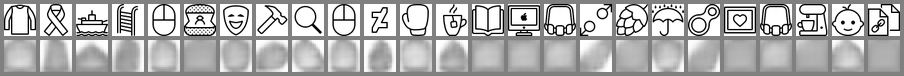

In [0]:
def decode_img(tile):
    tile = tile.reshape(tile.shape[:-1])
    tile = np.clip(tile * 255, 0, 255)
    return PIL.Image.fromarray(tile)
    

overview = PIL.Image.new('RGB', (cols * 36 + 4, 64 + 12), (128, 128, 128))
for idx in range(cols):
    overview.paste(decode_img(sample[idx]), (idx * 36 + 4, 4))
    overview.paste(decode_img(decoded_imgs[idx]), (idx * 36 + 4, 40))
f = BytesIO()
overview.save(f, 'png')
display(Image(data=f.getvalue()))

In [0]:
def augment(icons):
    aug_icons = []
    for icon in icons:
        for flip in range(4):
            for rotation in range(4):
                aug_icons.append(icon)
                icon = np.rot90(icon)
            icon = np.fliplr(icon)
    return np.asarray(aug_icons)

In [0]:
x_train_aug = augment(x_train)
x_test_aug = augment(x_test)

In [0]:
x_train_aug.shape

(13152, 32, 32, 1)

In [0]:
from keras.callbacks import TensorBoard
autoencoder = create_autoencoder()
autoencoder.fit(x_train_aug, x_train_aug,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_aug, x_test_aug),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 13152 samples, validate on 2336 samples
Epoch 1/100
13152/13152 [==============================] - 4s 303us/step - loss: 0.5382 - val_loss: 0.5130
Epoch 2/100
13152/13152 [==============================] - 3s 214us/step - loss: 0.5022 - val_loss: 0.5049
Epoch 3/100
13152/13152 [==============================] - 3s 217us/step - loss: 0.4960 - val_loss: 0.4923
Epoch 4/100
13152/13152 [==============================] - 3s 215us/step - loss: 0.4857 - val_loss: 0.4751
Epoch 5/100
13152/13152 [==============================] - 3s 216us/step - loss: 0.4703 - val_loss: 0.4712
Epoch 6/100
13152/13152 [==============================] - 3s 216us/step - loss: 0.4588 - val_loss: 0.4574
Epoch 7/100
13152/13152 [==============================] - 3s 215us/step - loss: 0.4501 - val_loss: 0.4511
Epoch 8/100
13152/13152 [==============================] - 3s 215us/step - loss: 0.4434 - val_loss: 0.4417
Epoch 9/100
13152/13152 [==============================] - 3s 215us/step - loss: 0.4367 - val_l

In [0]:
cols = 25
idx = np.random.randint(x_test.shape[0], size=cols)
sample = x_test[idx]
decoded_imgs = autoencoder.predict(sample)
decoded_imgs.shape

(25, 32, 32, 1)

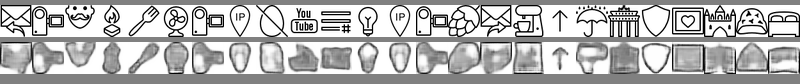

In [0]:
def decode_img(tile, factor=1.0):
    tile = tile.reshape(tile.shape[:-1])
    tile = np.clip(tile * 255, 0, 255)
    return PIL.Image.fromarray(tile)
    

overview = PIL.Image.new('RGB', (cols * 32, 64 + 20), (128, 128, 128))
for idx in range(cols):
    overview.paste(decode_img(sample[idx]), (idx * 32, 5))
    overview.paste(decode_img(decoded_imgs[idx]), (idx * 32, 42))
f = BytesIO()
overview.save(f, 'png')
display(Image(data=f.getvalue()))

In [0]:
batch_size = 250
latent_space_depth = 128

def sample_z(args):
    z_mean, z_log_var = args
    eps = K.random_normal(shape=(batch_size, latent_space_depth), mean=0., stddev=1.)
    return z_mean + K.exp(z_log_var / 2) * eps

In [0]:
def VariationalAutoEncoder(num_pixels):
    
    input_img = Input(shape=(32, 32, 1))

    channels = 4
    x = input_img
    for i in range(5):
        left = Conv2D(channels, (3, 3), activation='relu', padding='same')(x)
        right = Conv2D(channels, (2, 2), activation='relu', padding='same')(x)
        conc = Concatenate()([left, right])
        x = MaxPooling2D((2, 2), padding='same')(conc)
        channels *= 2

    x = Dense(channels)(x)
    encoder_hidden = Flatten()(x)

    z_mean = Dense(latent_space_depth, activation='linear')(encoder_hidden)
    z_log_var = Dense(latent_space_depth, activation='linear')(encoder_hidden)
    
    def KL_loss(y_true, y_pred):
        return 0.0001 * K.sum(K.exp(z_log_var) + K.square(z_mean) - 1 - z_log_var, axis=1)

    def reconstruction_loss(y_true, y_pred):
        y_true = K.batch_flatten(y_true)
        y_pred = K.batch_flatten(y_pred)
        return binary_crossentropy(y_true, y_pred)

    def total_loss(y_true, y_pred):
        return reconstruction_loss(y_true, y_pred) + KL_loss(y_true, y_pred)

    z = Lambda(sample_z, output_shape=(latent_space_depth, ))([z_mean, z_log_var])
    decoder_in = Input(shape=(latent_space_depth,))

    d_x = Reshape((1, 1, latent_space_depth))(decoder_in)
    e_x = Reshape((1, 1, latent_space_depth))(z)
    for i in range(5):
        conv = Conv2D(channels, (3, 3), activation='relu', padding='same')
        upsampling = UpSampling2D((2, 2))
        d_x = conv(d_x)
        d_x = upsampling(d_x)
        e_x = conv(e_x)
        e_x = upsampling(e_x)
        channels //= 2

    final_conv = Conv2D(1, (3, 3), activation='sigmoid', padding='same')
    auto_decoded = final_conv(e_x)
    decoder_out = final_conv(d_x)
    
    decoder = Model(decoder_in, decoder_out)    
    
    auto_encoder = Model(input_img, auto_decoded)

    auto_encoder.compile(optimizer=Adam(lr=0.001), 
                         loss=total_loss,
                         metrics=[KL_loss, reconstruction_loss])
    
    return auto_encoder, decoder

var_auto_encoder, decoder = VariationalAutoEncoder(32)
var_auto_encoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
conv2d_59 (Conv2D)              (None, 32, 32, 4)    40          input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_60 (Conv2D)              (None, 32, 32, 4)    20          input_8[0][0]                    
__________________________________________________________________________________________________
concatenate_19 (Concatenate)    (None, 32, 32, 8)    0           conv2d_59[0][0]                  
                                                                 conv2d_60[0][0]                  
__________

In [0]:
def truncate_to_batch(x):
    l = x.shape[0]
    return x[:l - l % batch_size, :, :, :]

x_train_trunc = truncate_to_batch(x_train)
x_test_trunc = truncate_to_batch(x_test)
x_train_trunc.shape, x_test_trunc.shape

((750, 32, 32, 1), (0, 32, 32, 1))

In [0]:
var_auto_encoder.fit(x_train_trunc, x_train_trunc, verbose=1, 
                 batch_size=batch_size, epochs=100,
                 validation_data=(x_test_trunc, x_test_trunc))

Train on 750 samples, validate on 0 samples
Epoch 1/100
750/750 [==============================] - 2s 3ms/step - loss: 0.6848 - KL_loss: 0.0014 - reconstruction_loss: 0.6834
Epoch 2/100
750/750 [==============================] - 0s 179us/step - loss: 0.6073 - KL_loss: 0.0023 - reconstruction_loss: 0.6050
Epoch 3/100
750/750 [==============================] - 0s 164us/step - loss: 0.5866 - KL_loss: 0.0048 - reconstruction_loss: 0.5818
Epoch 4/100
750/750 [==============================] - 0s 157us/step - loss: 0.5632 - KL_loss: 0.0014 - reconstruction_loss: 0.5617
Epoch 5/100
750/750 [==============================] - 0s 145us/step - loss: 0.5539 - KL_loss: 7.6784e-04 - reconstruction_loss: 0.5532
Epoch 6/100
750/750 [==============================] - 0s 145us/step - loss: 0.5459 - KL_loss: 6.9418e-04 - reconstruction_loss: 0.5452
Epoch 7/100
750/750 [==============================] - 0s 145us/step - loss: 0.5360 - KL_loss: 5.0395e-04 - reconstruction_loss: 0.5355
Epoch 8/100
750/750 [=

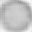

In [0]:
random_number = np.asarray([[np.random.normal() 
                            for _ in range(latent_space_depth)]])
img_width, img_height = 32, 32
def decode_img(a):
    a = np.clip(a * 256, 0, 255).astype('uint8')
    return PIL.Image.fromarray(a)

decode_img(decoder.predict(random_number).reshape(img_width, img_height))

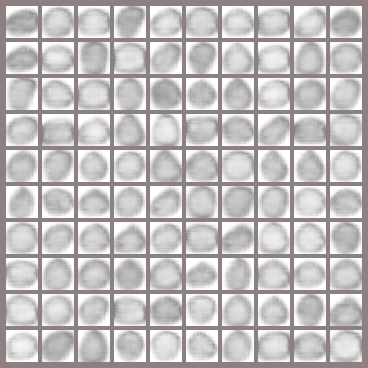

In [0]:
num_cells = 10

overview = PIL.Image.new('RGB', 
                         (num_cells * (img_width + 4) + 8, 
                          num_cells * (img_height + 4) + 8), 
                         (140, 128, 128))
for x in range(num_cells):
    for y in range(num_cells):
        vec = np.asarray([[np.random.normal() * 1.4 
                            for _ in range(latent_space_depth)]])
        decoded = decoder.predict(vec)
        img = decode_img(decoded.reshape(img_width, img_height))
        overview.paste(img, (x * (img_width + 4) + 6, y * (img_height + 4) + 6))
overview

In [0]:
def truncate_to_batch(x):
    l = x.shape[0]
    return x[:l - l % batch_size, :, :, :]

x_train_trunc = truncate_to_batch(x_train_aug)
x_test_trunc = truncate_to_batch(x_test_aug)
x_train_trunc.shape, x_test_trunc.shape

var_auto_encoder.fit(x_train_trunc, x_train_trunc, verbose=1, 
                 batch_size=batch_size, epochs=100,
                 validation_data=(x_test_trunc, x_test_trunc))


Train on 13000 samples, validate on 2250 samples
Epoch 1/100
13000/13000 [==============================] - 2s 182us/step - loss: 0.4482 - KL_loss: 0.0060 - reconstruction_loss: 0.4422 - val_loss: 0.4478 - val_KL_loss: 0.0066 - val_reconstruction_loss: 0.4412
Epoch 2/100
13000/13000 [==============================] - 2s 154us/step - loss: 0.4392 - KL_loss: 0.0069 - reconstruction_loss: 0.4323 - val_loss: 0.4396 - val_KL_loss: 0.0071 - val_reconstruction_loss: 0.4325
Epoch 3/100
13000/13000 [==============================] - 2s 156us/step - loss: 0.4331 - KL_loss: 0.0072 - reconstruction_loss: 0.4258 - val_loss: 0.4338 - val_KL_loss: 0.0076 - val_reconstruction_loss: 0.4262
Epoch 4/100
13000/13000 [==============================] - 2s 155us/step - loss: 0.4277 - KL_loss: 0.0074 - reconstruction_loss: 0.4203 - val_loss: 0.4287 - val_KL_loss: 0.0078 - val_reconstruction_loss: 0.4209
Epoch 5/100
13000/13000 [==============================] - 2s 155us/step - loss: 0.4235 - KL_loss: 0.0076 -

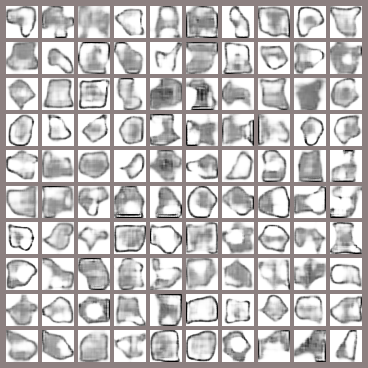

In [0]:
num_cells = 10

overview = PIL.Image.new('RGB', 
                         (num_cells * (img_width + 4) + 8, 
                          num_cells * (img_height + 4) + 8), 
                         (140, 128, 128))
for x in range(num_cells):
    for y in range(num_cells):
        vec = np.asarray([[np.random.normal() * 1.2 
                            for _ in range(latent_space_depth)]])
        decoded = decoder.predict(vec)
        img = decode_img(decoded.reshape(img_width, img_height))
        overview.paste(img, (x * (img_width + 4) + 6, y * (img_height + 4) + 6))
overview

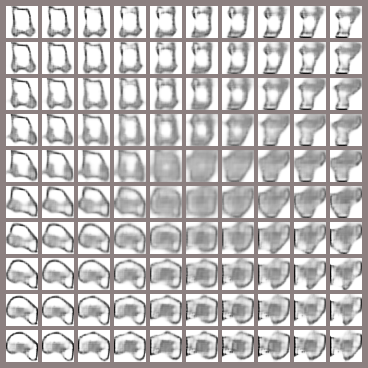

In [0]:
num_cells = 10

overview = PIL.Image.new('RGB', 
                         (num_cells * (img_width + 4) + 8, 
                          num_cells * (img_height + 4) + 8), 
                         (140, 128, 128))
for x in range(num_cells):
    for y in range(num_cells):
        vec = np.asarray([[ - (i % 2) * (x - 4.5) / 3 + ((i + 1) % 2) * (y - 4.5) / 3
                            for i in range(latent_space_depth)]])
        decoded = decoder.predict(vec)
        img = decode_img(decoded.reshape(img_width, img_height))
        overview.paste(img, (x * (img_width + 4) + 6, y * (img_height + 4) + 6))
overview

In [0]:
import numpy as np
from keras.layers import Input, Dense, Lambda, Flatten
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Concatenate
from keras.layers.merge import concatenate as concat
from keras.models import Model
from keras import backend as K
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import json
from collections import Counter
from io import BytesIO
import PIL
from keras.preprocessing.image import load_img, img_to_array
from IPython.display import clear_output, Image, display, HTML

In [0]:
batch_size = 250 # batch size

def augment(icons, labels, size):
    aug_icons = []
    aug_labels = []
    for icon, label in zip(icons, labels):
        for flip in range(4):
            for rotation in range(4):
                aug_icons.append(icon)
                aug_labels.append(label)
                icon = np.rot90(icon)
            icon = np.fliplr(icon)
            if flip % 2 == 0:
                icon = np.flipud(icon)
    aug_icons = np.asarray(aug_icons) / 255

    return aug_icons, np.asarray(aug_labels)

def load_icons(train_size=0.90, size=28):
    icon_index = json.load(open('icons/index.json'))
    cat_count = Counter(icon['category'] for icon in icon_index)
    cats = [cat for cat, count in cat_count.items() if count > 50]
    cat_to_index = {cat: idx for idx, cat in enumerate(cats)}
    x = []
    y = []
    img_rows, img_cols = size, size
    for icon in icon_index:
        if icon['name'].endswith('_filled'):
            continue
        cat_idx = cat_to_index.get(icon['category'])
        if cat_idx is None:
            continue
        img_path = 'icons/png%d/%s.png' % (size, icon['name'])
        img = load_img(img_path, grayscale=True, target_size=(img_rows, img_cols))
        img = img_to_array(img)
        x.append(img)
        y.append(cat_idx)
    target_size = len(x) - (len(x) % batch_size)
    x = x[:target_size]
    y = y[:target_size]
    x = np.asarray(x)
    y = np.asarray(y)
    train_size = int(train_size * x.shape[0])
    train_size -= train_size % batch_size
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=train_size)
    x_train, y_train = augment(x_train, y_train, size=size)
    x_test, y_test = augment(x_test, y_test, size=size)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = load_icons(size=32)
x_train.shape

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


(8000, 32, 32, 1)

In [0]:
batch_size = 250
latent_space_depth = 128

def sample_z(args):
    z_mean, z_log_var = args
    eps = K.random_normal(shape=(batch_size, latent_space_depth), mean=0., stddev=1.)
    return z_mean + K.exp(z_log_var / 2) * eps

In [0]:
def VariationalAutoEncoder(num_pixels):
    pixels = Input(shape=(num_pixels, num_pixels, 1))
    channels = 4
    x = pixels
    for i in range(4):
        left = Conv2D(channels, (3, 3), activation='relu', padding='same')(x)
        right = Conv2D(channels, (2, 2), activation='relu', padding='same')(x)
        conc = Concatenate()([left, right])
        x = MaxPooling2D((2, 2), padding='same')(conc)
        channels *= 2

    x = Dense(32)(x) 
    x = Flatten()(x)
    encoder_hidden = Dense(latent_space_depth, name='encoder_hidden')(x)

    z_mean = Dense(latent_space_depth, activation='linear', name='z_mean')(encoder_hidden)
    z_log_var = Dense(latent_space_depth, activation='linear', name='z_log_var')(encoder_hidden)
    
    def KL_loss(y_true, y_pred):
        return 0.5 * K.sum(K.exp(z_log_var) + K.square(z_mean) - 1 - z_log_var, axis=1)

    def reconstruction_loss(y_true, y_pred):
        y_true = K.batch_flatten(y_true)
        y_pred = K.batch_flatten(y_pred)
        return K.sum(K.binary_crossentropy(y_true, y_pred), axis=-1)    

    def total_loss(y_true, y_pred):
        return KL_loss(y_true, y_pred) + reconstruction_loss(y_true, y_pred)

    z = Lambda(sample_z, output_shape=(latent_space_depth, ))([z_mean, z_log_var])
    
    up_samp0 = UpSampling2D((2, 2))
    up_conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')
    up_samp1 = UpSampling2D((2, 2))
    up_conv2 = Conv2D(16, (3, 3), activation='relu', padding='same')
    up_samp2 = UpSampling2D((2, 2))
    up_conv3 = Conv2D(8, (3, 3), activation='relu', padding='same')
    up_samp3 = UpSampling2D((2, 2))
    up_conv4 = Conv2D(4, (3, 3), activation='relu', padding='same')
    up_samp4 = UpSampling2D((2, 2))
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')

    decoder_in = Input(shape=(latent_space_depth,))
    d_x = Reshape((1, 1, latent_space_depth))(decoder_in)
    d_x = up_samp0(d_x)
    d_x = up_conv1(d_x)
    d_x = up_samp1(d_x)
    d_x = up_conv2(d_x)
    d_x = up_samp2(d_x)
    d_x = up_conv3(d_x)
    d_x = up_samp3(d_x)
    d_x = up_conv4(d_x)
    d_x = up_samp4(d_x)
    decoder_out= decoded(d_x)

    decoder = Model(decoder_in, decoder_out)    

    a_x = Reshape((1, 1, latent_space_depth))(z)
    a_x = up_samp0(a_x)
    a_x = up_conv1(a_x)
    a_x = up_samp1(a_x)
    a_x = up_conv2(a_x)
    a_x = up_samp2(a_x)
    a_x = up_conv3(a_x)
    a_x = up_samp3(a_x)
    a_x = up_conv4(a_x)
    a_x = up_samp4(a_x)
    outputs= decoded(a_x)
    
    auto_encoder = Model(pixels, outputs)

    auto_encoder.compile(optimizer=Adam(lr=0.001), 
                         loss=total_loss,
                         metrics=[KL_loss, reconstruction_loss])
    
    return auto_encoder, decoder

auto_encoder, decoder = VariationalAutoEncoder(x_train.shape[1])
auto_encoder.summary()

W0711 12:52:42.547657 140668581148544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0711 12:52:42.599373 140668581148544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0711 12:52:42.770042 140668581148544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0711 12:52:42.796567 140668581148544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.

W0711 12:52:43.016710 140668581148

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 4)    40          input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 4)    20          input_2[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 32, 32, 8)    0           conv2d_1[0][0]                   
                                                                 conv2d_2[0][0]                   
__________

In [0]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8000, 32, 32, 1), (8000,), (4000, 32, 32, 1), (4000,))

In [0]:
auto_encoder.fit(x_train, x_train, verbose=1, 
                 batch_size=batch_size, epochs=100,
                 validation_data=(x_test, x_test))

Train on 8000 samples, validate on 4000 samples
Epoch 1/100
8000/8000 [==============================] - 8s 1ms/step - loss: 587.8387 - KL_loss: 4.5434 - reconstruction_loss: 583.2953 - val_loss: 536.1173 - val_KL_loss: 3.7923 - val_reconstruction_loss: 532.3250
Epoch 2/100
8000/8000 [==============================] - 1s 132us/step - loss: 535.1850 - KL_loss: 3.3608 - reconstruction_loss: 531.8242 - val_loss: 524.0602 - val_KL_loss: 3.2081 - val_reconstruction_loss: 520.8522
Epoch 3/100
8000/8000 [==============================] - 1s 133us/step - loss: 524.6892 - KL_loss: 3.8474 - reconstruction_loss: 520.8418 - val_loss: 512.4328 - val_KL_loss: 5.5251 - val_reconstruction_loss: 506.9077
Epoch 4/100
8000/8000 [==============================] - 1s 131us/step - loss: 517.4633 - KL_loss: 4.1307 - reconstruction_loss: 513.3326 - val_loss: 505.9922 - val_KL_loss: 5.1725 - val_reconstruction_loss: 500.8197
Epoch 5/100
8000/8000 [==============================] - 1s 131us/step - loss: 510.376

In [0]:
random_number = np.asarray([[np.random.normal() 
                            for _ in range(latent_space_depth)]])
print(random_number)

[[ 3.78808210e-01 -8.77841253e-01  9.00099001e-01 -4.56588146e-01
  -2.04139167e-02 -1.11313384e+00  2.26683465e-01  1.03779669e+00
   6.84050016e-01 -2.89321173e-01  8.38690936e-02 -8.98249791e-01
  -1.54410331e+00 -2.11550923e+00 -2.32847808e+00  8.63770257e-01
   1.22431172e+00  5.85039902e-01  4.75391899e-01 -2.49118563e-01
  -9.16595658e-01  5.15486718e-01 -6.89654369e-01 -7.20705743e-01
  -7.91145896e-01 -1.54825506e+00 -1.81198482e+00  1.83917355e+00
   8.97117727e-01 -1.03337224e-01 -1.77708809e-01  8.74299739e-01
  -1.15901157e+00 -1.23868245e+00 -1.17457955e-01  1.06824996e-01
  -6.87990038e-01 -1.09859316e-01  4.14183194e-01  1.49946231e+00
  -4.94398627e-01  2.08645621e-01 -2.14596929e+00  3.32687002e-01
   8.43727656e-01 -9.39909828e-01 -2.15502657e-01 -4.12302330e-02
  -2.03373168e+00 -1.15428969e+00  1.54866474e+00  2.31508942e+00
   8.02210712e-02 -6.28418690e-01 -1.68465542e-01 -9.75442403e-02
   5.68803230e-01 -1.30645822e-01  4.98007128e-01 -1.06289037e+00
  -1.44182

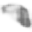

In [0]:
img_width, img_height = 32, 32
def decode_img(a):
    a = np.clip(a * 256, 0, 255).astype('uint8')
    return PIL.Image.fromarray(a)

decode_img(decoder.predict(random_number).reshape(img_width, img_height))

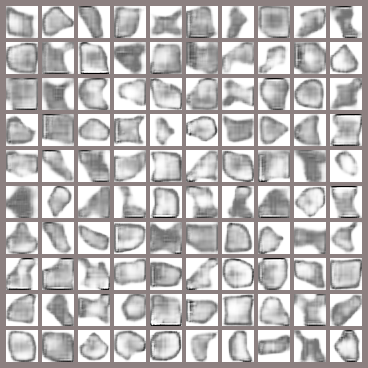

In [0]:
num_cells = 10

overview = PIL.Image.new('RGB', 
                         (num_cells * (img_width + 4) + 8, 
                          num_cells * (img_height + 4) + 8), 
                         (140, 128, 128))

for x in range(num_cells):
    for y in range(num_cells):
        vec = np.asarray([[np.random.normal() 
                            for _ in range(latent_space_depth)]])
        decoded = decoder.predict(vec)
        img = decode_img(decoded.reshape(img_width, img_height))
        overview.paste(img, (x * (img_width + 4) + 6, y * (img_height + 4) + 6))
overview

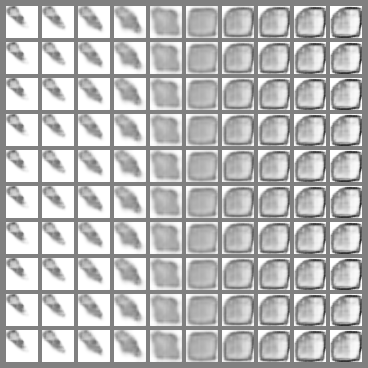

In [0]:
num_cells = 10

overview = PIL.Image.new('RGB', 
                         (num_cells * (img_width + 4) + 8, 
                          num_cells * (img_height + 4) + 8), 
                         (128, 128, 128))

vec = np.zeros((1, latent_space_depth))
for x in range(num_cells):
    vec[: 1] = (x * 3) / (num_cells - 1) - 1.5
    for y in range(num_cells):
#        vec[: 1] = (y * 3) / (num_cells - 1) - 1.5
        decoded = decoder.predict(vec)
        img = decode_img(decoded.reshape(img_width, img_height))
        overview.paste(img, (x * (img_width + 4) + 6, y * (img_height + 4) + 6))
overview

**Icon GAN**

In [0]:
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array

from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Reshape, Conv2DTranspose, BatchNormalization, LeakyReLU
from keras.layers import Activation, Conv2D, Lambda, Concatenate, Flatten, Dense, UpSampling2D

from keras.utils import np_utils
import keras
import colorsys
import keras.backend as K
import glob
import json
from sklearn.model_selection import train_test_split
from io import BytesIO
import PIL
from IPython.display import clear_output, Image, display, HTML

import math
import random

import numpy as np
import matplotlib.pyplot as plt

import cv2

In [0]:
BATCH_SIZE = 32
LATENT_SIZE = 128

In [27]:
def augment(icons):
    aug_icons = []
    for icon in icons:
        for flip in range(4):
            for rotation in range(4):
                aug_icons.append(icon)
                icon = np.rot90(icon)
            icon = np.fliplr(icon)
    return np.asarray(aug_icons)
        

def load_icons(train_size=0.85):
    icon_index = json.load(open('icons/index.json'))
    x = []
    img_rows, img_cols = 32, 32
    for icon in icon_index:
        if icon['name'].endswith('_filled'):
            continue
        img_path = 'icons/png32/%s.png' % icon['name']
        img = load_img(img_path, grayscale=True, target_size=(img_rows, img_cols))
        img = img_to_array(img)
        x.append(img)
    x = np.asarray(x) / 255
    x_train, x_val = train_test_split(x, train_size=train_size)
    return augment(x_train), augment(x_val)

x_train, x_test = load_icons()
x_train.shape, x_test.shape

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


((13152, 32, 32, 1), (2336, 32, 32, 1))

In [0]:
import keras.backend as K

K.clear_session()

In [36]:
def create_generative_network(latent_size):
    inp = Input(shape=(latent_size,))
    x = Reshape((1, 1, latent_size))(inp)

    channels = latent_size
    padding = 'valid'
    strides = 1
    for i in range(4):
        x = Conv2DTranspose(channels, kernel_size=4,
                            strides=strides, padding=padding)(x)
        x = BatchNormalization()(x)
        x = LeakyReLU(.2)(x)
        
        channels //= 2
        padding = 'same'
        strides = 2

    x = Conv2DTranspose(1, kernel_size=4, strides=1, padding='same')(x)
    image_out = Activation('tanh')(x)

    model = Model(inputs=inp, outputs=image_out)
    return model

generator = create_generative_network(LATENT_SIZE)
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 1, 128)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 4, 4, 128)         262272    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 8, 8, 64)          131136    
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 64)          256       
__________

In [37]:
def create_discriminative_network():
    inp = Input(shape=(32, 32, 1))
    x = inp

    channels = 16

    for i in range(4):
        layers = []
        conv = Conv2D(channels, 3, strides=2, padding='same')(x)
        if i:
            conv = BatchNormalization()(conv)
        conv = LeakyReLU(.2)(conv)
        layers.append(conv)
        bv = Lambda(lambda x: K.mean(K.abs(x[:] - K.mean(x, axis=0)), 
                                     axis=-1, 
                                     keepdims=True))(conv)
        layers.append(bv)
        channels *= 2
        x = Concatenate()(layers)

    x = Conv2D(128, 2, padding='valid')(x)
    x = Flatten(name='flatten')(x)
    
    fake = Dense(1, activation='sigmoid', name='generation')(x)

    m = Model(inputs=inp, outputs=fake)
    return m

discriminator = create_discriminative_network()
discriminator.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 16, 16, 16)   160         input_2[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_5 (LeakyReLU)       (None, 16, 16, 16)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 16, 16, 1)    0           leaky_re_lu_5[0][0]              
__________________________________________________________________________________________________
concatenat

In [38]:
def gan(g, d):
    # initialize a GAN trainer

    # this is the fastest way to train a GAN in Keras
    # two models are updated simutaneously in one pass

    noise = Input(shape=g.input_shape[1:])
    real_data = Input(shape=d.input_shape[1:])

    generated = g(noise)
    gscore = d(generated)
    rscore = d(real_data)

    def log_eps(i):
        return K.log(i+1e-11)

    # single side label smoothing: replace 1.0 with 0.9
    dloss = - K.mean(log_eps(1-gscore) + .1 * log_eps(1-rscore) + .9 * log_eps(rscore))
    gloss = - K.mean(log_eps(gscore))

    Adam = tf.train.AdamOptimizer

    lr, b1 = 1e-4, .2 # otherwise won't converge.
    optimizer = Adam(lr,beta1=b1)

    grad_loss_wd = optimizer.compute_gradients(dloss, d.trainable_weights)
    update_wd = optimizer.apply_gradients(grad_loss_wd)

    grad_loss_wg = optimizer.compute_gradients(gloss, g.trainable_weights)
    update_wg = optimizer.apply_gradients(grad_loss_wg)

    def get_internal_updates(model):
        # get all internal update ops (like moving averages) of a model
        inbound_nodes = model._inbound_nodes # change inbound_nodes
        input_tensors = []
        for ibn in inbound_nodes:
            input_tensors+= ibn.input_tensors
        updates = [model.get_updates_for(i) for i in input_tensors]
        return updates

    other_parameter_updates = [get_internal_updates(m) for m in [d,g]]
    # those updates includes batch norm.

    train_step = [update_wd, update_wg, other_parameter_updates]
    losses = [dloss, gloss]

    learning_phase = K.learning_phase()

    def gan_feed(sess,batch_image,z_input):
        # actual GAN trainer
        nonlocal train_step,losses,noise,real_data,learning_phase

        res = sess.run([train_step,losses],feed_dict={
        noise:z_input,
        real_data:batch_image,
        learning_phase:True,
        # Keras layers needs to know whether
        # this run is training or testring (you know, batch norm and dropout)
        })

        loss_values = res[1]
        return loss_values #[dloss,gloss]

    return gan_feed

print('generating GAN...')
gan_feed = gan(generator, discriminator)

generating GAN...


In [0]:
def generate_images(generator, count):
    noise = np.random.normal(loc=0., 
                             scale=1., 
                             size=(count, LATENT_SIZE))
    for tile in generator.predict([noise]).reshape((count, 32, 32)):
        tile = (tile * 300).clip(0, 255).astype('uint8')
        yield PIL.Image.fromarray(tile)

def poster(generator, w_count, h_count):
    overview = PIL.Image.new('RGB', (w_count * 34 + 2, h_count * 34 + 2), (128, 128, 128))
    for idx, img in enumerate(generate_images(generator, w_count * h_count)):
        x = idx % w_count
        y = idx // w_count
        overview.paste(img, (x * 34 + 2, y * 34 + 2))
    return overview

0 dloss: 0.62 gloss: 2.65


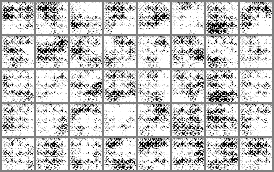

In [40]:
def run(epochs=100):
    sess = K.get_session()
    l = x_train.shape[0]
    l -= l % BATCH_SIZE
    for epoch in range(epochs):
        np.random.shuffle(x_train)
        for batch_start in range(0, l, BATCH_SIZE):
            batch = x_train[batch_start: batch_start + BATCH_SIZE]
            z_input = np.random.normal(loc=0., 
                                       scale=1., 
                                       size=(BATCH_SIZE, LATENT_SIZE))
            dloss, gloss = gan_feed(sess, batch, z_input)
        clear_output(wait=True)
        print('%d dloss: %2.2f gloss: %2.2f' % (epoch, dloss, gloss))
        f = BytesIO()
        poster(generator, 8, 5).save(f, 'png')
        display(Image(data=f.getvalue()))
run(1)

29 dloss: 1.05 gloss: 1.28


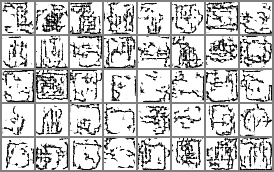

In [41]:
run(30)

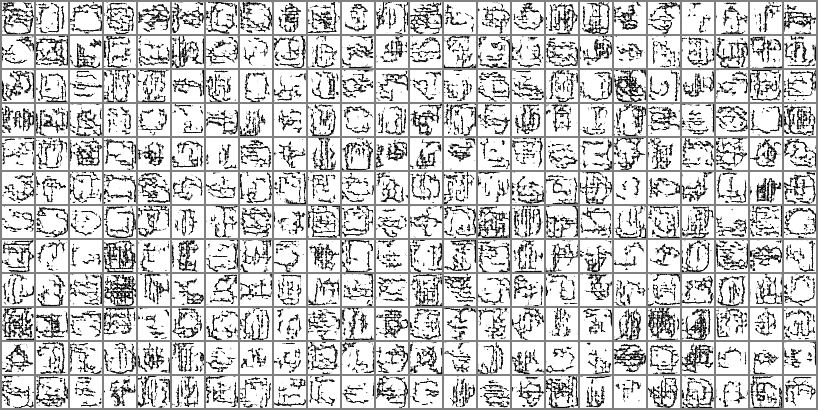

In [42]:
f = BytesIO()
poster(generator, 24, 12).save(f, 'png')
display(Image(data=f.getvalue()))

**Icon RNN**

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import Reshape, Concatenate, LSTM, Dropout
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers.wrappers import TimeDistributed
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras import backend as K
import random
import matplotlib.pyplot as plt
import json
import keras.callbacks
import glob
from sklearn.model_selection import train_test_split
import numpy as np
from io import BytesIO
import PIL
from IPython.display import clear_output, Image, display, HTML

In [47]:
def encode_icon(img, icon_size):
    size_last_x = 0
    encoded = []
    for y in range(icon_size):
        for x in range(icon_size):
            p = img.getpixel((x, y))
            if img.getpixel((x, y)) < 192:
                encoded.append(x)
                size_last_x = len(encoded)
        encoded.append(icon_size)
    return encoded[:size_last_x]

def decode_icon(encoded, icon_size, rows=None, stop_token=None):
    y = 0
    for idx in encoded:
        if idx == icon_size:
            y += 1
        elif idx == icon_size + 1:
            break
        else:
            x = idx
            yield x, y

def make_array(icons):
    res = []
    for icon in icons:
        res.extend(icon)
        res.append(33)
    return np.asarray(res)

def load_icons(train_size=0.90):
    icon_index = json.load(open("icons/index.json"))
    x = []
    img_rows, img_cols = 32, 32
    for icon in icon_index:
        if icon["name"].endswith("_filled"):
            continue
        img_path = "icons/png32/%s.png" % icon["name"]
        img = PIL.Image.open(img_path)
        if img.mode != "L":
            img = img.convert("L")
        x.append(encode_icon(img, 32))
    x_train, x_val = train_test_split(x, train_size=train_size)
    x_train = make_array(x_train)
    x_val = make_array(x_val)
    return x_train, x_val

x_train, x_test = load_icons()
x_train.shape, x_test.shape

((265770,), (29842,))

In [64]:
def icon_rnn_model(num_chars, num_layers, num_nodes=512, dropout=0.1):
    input = Input(shape=(None, num_chars), name="input")
    prev = input
    for i in range(num_layers):
        lstm = LSTM(num_nodes, return_sequences=True, name="lstm_layer_%d" %(i + 1))(prev)
        if dropout:
            prev = Dropout(dropout)(lstm)
        else:
            prev = lstm
    dense = TimeDistributed(Dense(num_chars, name="dense", activation="softmax"))(prev)
    model = Model(inputs=[input], outputs=[dense])
    optimizer = RMSprop(lr=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


model = icon_rnn_model(34, num_layers=2, num_nodes=256, dropout=0)
model.summary()    

W0712 06:33:31.305984 139966673676160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, None, 34)          0         
_________________________________________________________________
lstm_layer_1 (LSTM)          (None, None, 256)         297984    
_________________________________________________________________
lstm_layer_2 (LSTM)          (None, None, 256)         525312    
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 34)          8738      
Total params: 832,034
Trainable params: 832,034
Non-trainable params: 0
_________________________________________________________________


In [65]:
CHUNK_SIZE = 160

def data_generator(corpus, icon_size, batch_size, chunk_size):
    X = np.zeros((batch_size, chunk_size, icon_size+2))
    y = np.zeros((batch_size, chunk_size, icon_size+2))
    while True:
        for row in range(batch_size):
            idx = random.randrange(len(corpus)-chunk_size-1)
            chunk = np.zeros((chunk_size+1, icon_size+2))
            for i in range(chunk_size+1):
                chunk[i, corpus[idx+i]] = 1
            X[row, :, :] = chunk[:chunk_size]
            y[row, :, :] = chunk[1:]
        yield X, y

next(data_generator(x_train, 32, 1, chunk_size=20))

(array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.]

In [66]:
early = keras.callbacks.EarlyStopping(monitor='loss',
                              min_delta=0.03,
                              patience=3,
                              verbose=0, mode='auto')

BATCH_SIZE = 256
model.fit_generator(
    data_generator(x_train, 32, batch_size=BATCH_SIZE, chunk_size=CHUNK_SIZE),
    validation_data=data_generator(x_test, 32, batch_size=BATCH_SIZE, chunk_size=CHUNK_SIZE),
    epochs=100,
    callbacks=[early,],
    steps_per_epoch=2 * len(x_train) / (BATCH_SIZE * CHUNK_SIZE),
    validation_steps=2 * len(x_test) / (BATCH_SIZE * CHUNK_SIZE),
    verbose=2
)

W0712 06:55:10.852647 139966673676160 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
 - 8s - loss: 4.0013 - acc: 0.0635 - val_loss: 3.4878 - val_acc: 0.0986
Epoch 2/100
 - 6s - loss: 3.5399 - acc: 0.0939 - val_loss: 3.5543 - val_acc: 0.0358
Epoch 3/100
 - 6s - loss: 3.5591 - acc: 0.0787 - val_loss: 3.5420 - val_acc: 0.0973
Epoch 4/100
 - 6s - loss: 3.5539 - acc: 0.0836 - val_loss: 3.5599 - val_acc: 0.0979
Epoch 5/100
 - 6s - loss: 3.5841 - acc: 0.0792 - val_loss: 3.5858 - val_acc: 0.0344


In [0]:
def generate_icons(model, num=2, diversity=1.0):
    start_index = random.randint(0, len(x_test)- CHUNK_SIZE-1)
    generated = x_test[start_index: start_index+CHUNK_SIZE]
    sofar = None
    while num > 0:
        x = np.zeros((1, len(generated), 34))
        for t, char in enumerate(generated):
            x[0, t, char] = 1
        preds = model.predict(x, verbose=0)[0]
        if diversity is None:
            next_index = np.argmax(preds[len(generated)-1])
        else:
            preds = np.asarray(preds[len(generated) - 1]).astype('float64')
            preds = np.log(preds) / diversity
            exp_preds = np.exp(preds)
            preds = exp_preds / np.sum(exp_preds)
            probas = np.random.multinomial(1, preds, 1)
            next_index = np.argmax(probas)
        if sofar is not None:
            if next_index == 33:
                icon = PIL.Image.new('L', (32, 32), 'white')
                for x, y in decode_icon(sofar, 32):
                    if y < 32:
                        icon.putpixel((x, y), 0)
                yield icon
                num -= 1
            else:
                sofar.append(next_index)
        if next_index == 33:
            sofar = []
    return sofar

In [0]:
cols = 10
rows = 10
overview = PIL.Image.new('RGB', (cols * 36 + 4, rows * 36 + 4), (128, 128, 128))
for idx, icon in enumerate(generate_icons(model, num=cols * rows)):
    x = idx % cols
    y = idx // cols
    overview.paste(icon, (x * 36 + 4, y * 36 + 4))
overview